# Proyecto: Buscá libre libros

#### Fuente de datos
    https://www.buscalibre.com.ar/

#### Objetivo
    Analizar los datos para encontrar información relevante utilizando el método de webScrapping para recabar información sobre la elección de los lectores a la hora de seleccionar un libro y mediante el modelo de regresión poder predecir los títulos más recomendados.

#### Contexto comercial
    La libreria virtual "Busca libre" quiere saber que libros son los más populares entre los lectores, para poder recomendar a sus clientes los ejemplares con mejor calificación y poder brindar una mejor experiencia en la selección de un libro.

#### Problema comercial
    Dado que la libreria "Busca libre" es online, y no existe una persona que pueda atender las necesidades de los clientes, como la recomendación de un libro, se busca brindar una mejor experiencia a los usuarios en la selección de un libro mediante la web.

#### Contexto analítico
    Se nos presenta un dataset con todos los libros disponibles en la libreria virtual.

#### Hipótesis
    Los libros más populares son los mejores calificados y los mas comentados.
    Los libros menos populares son los peores calificados y los menos comentados.

#### Variables categóricas
    Titulo: título del libro.
    Categoría: genéro del libro.
    Autor: autor del libro.    
    Descuento: porcentaje de descuento aplicado al libro.
    Precio sin descuento: precio normal de lista, sin ninguna rebaja.
    Precio con descuento: precio de venta, con todas las rebajas aplicadas.
    Comentario: Cantidad de comentarios por libro.
    Estrellas: Calificación del libro según el lector.
    Año: año de edición del libro.
    Editorial: Editorial del libro.


# Análisis exploratorio de datos

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

A continuación, realizamos webscrapping en la página www.buscalibre.com.ar, tomamos los libros de las primeras 5 páginas de las categorías 'Ficción' y 'Filosofía'.

In [2]:
def extract(page):
    url = requests.get(f'https://www.buscalibre.com.ar/libros/ficcion?page={page}')
    contenido = url.content
    soup = BeautifulSoup(contenido, 'html.parser')
    return soup

def transform(soup):
    divs = soup.find_all('div', class_ = 'box-producto')
    global comentario2
    for item in divs:
        titulo = item.find('h3', {'class': 'nombre margin-top-10 text-align-left'}).text.strip().replace('\n', '')
        descripcion = item.find('div', {'class': 'autor color-dark-gray metas hide-on-hover'}).text.strip().replace('\n', '')
        autor = item.find('div', {'class': 'autor'}).text.strip().replace('\n', '')
        descuento = item.find('div',{'class':'descuento-v2 color-white position-relative'}).text.strip().replace('%dcto', '')
        precio_c_dcto = item.find('p',{'class':'precio-ahora hide-on-hover margin-0 font-size-medium'}).text.strip().replace('$', '')
        precio_s_dcto = item.find('p',{'class':'precio-antes hide-on-hover margin-0 color-dark-gray font-weight-normal'}).text.strip().replace('$', '')
        
        try:
            comentario = item.find('span', {'class': 'color-dark-gray font-weight-light margin-left-5 font-size-small'}).text.strip().replace('(', '')
            comentario2= comentario.replace(')','')
            estrella = item.find('span', {'class':'small'})
            estrella2 = estrella['class'][-1]
            
        except:
            comentario = 0
            estrella2 = 0
        
        book = {
            'Titulo': titulo,
            'Descripcion' : descripcion,
            'Autor' : autor,
            'Comentario' : comentario2,
            'Descuento' : descuento,
            'Precio_c_dcto' : precio_c_dcto,
            'Precio_s_dcto' : precio_s_dcto,
            'Estrellas' : estrella2
        } 
        
        booklist.append(book)
    return

booklist=[]

for i in range(0, 5):
    c = extract(i)
    transform(c)

df_libros_ficcion = pd.DataFrame(booklist)
df_libros_ficcion['Categoria'] = 'Ficción'

In [3]:
def extract(page):
    url = requests.get(f'https://www.buscalibre.com.ar/libros/filosofia-religion/filosofia?page={page}')
    contenido = url.content
    soup = BeautifulSoup(contenido, 'html.parser')
    return soup

def transform(soup):
    divs = soup.find_all('div', class_ = 'box-producto')
    global comentario2
    for item in divs:
        titulo = item.find('h3', {'class': 'nombre margin-top-10 text-align-left'}).text.strip().replace('\n', '')
        descripcion = item.find('div', {'class': 'autor color-dark-gray metas hide-on-hover'}).text.strip().replace('\n', '')
        autor = item.find('div', {'class': 'autor'}).text.strip().replace('\n', '')
        descuento = item.find('div',{'class':'descuento-v2 color-white position-relative'}).text.strip().replace('%dcto', '')
        precio_c_dcto = item.find('p',{'class':'precio-ahora hide-on-hover margin-0 font-size-medium'}).text.strip().replace('$', '')
        precio_s_dcto = item.find('p',{'class':'precio-antes hide-on-hover margin-0 color-dark-gray font-weight-normal'}).text.strip().replace('$', '')
        
        try:
            comentario = item.find('span', {'class': 'color-dark-gray font-weight-light margin-left-5 font-size-small'}).text.strip().replace('(', '')
            comentario2= comentario.replace(')','')
            estrella = item.find('span', {'class':'small'})
            estrella2 = estrella['class'][-1]
            
        except:
            comentario = 0
            estrella2 = 0
        
        book = {
            'Titulo': titulo,
            'Descripcion' : descripcion,
            'Autor' : autor,
            'Comentario' : comentario2,
            'Descuento' : descuento,
            'Precio_c_dcto' : precio_c_dcto,
            'Precio_s_dcto' : precio_s_dcto,
            'Estrellas' : estrella2
        } 
        
        booklist.append(book)
    return

booklist=[]

for i in range(0, 5):
    c = extract(i)
    transform(c)

df_libros_filosofia = pd.DataFrame(booklist)
df_libros_filosofia['Categoria'] = 'Filosofía'

En el proceso de obtener los datasets, transformamos algunos datos.
También le indicamos que para los titulos que no tienen comentarios o calificación, los complete con 0.
Luego concatenamos ambos datasets 'Ficción' y 'Filosofía'.

In [4]:
dframes = [df_libros_ficcion, df_libros_filosofia]
df_libros = pd.concat(dframes, axis=0, ignore_index=True)
df_libros.head()

,Titulo,Descripcion,Autor,Comentario,Descuento,Precio_c_dcto,Precio_s_dcto,Estrellas,Categoria
0,Lo Nuestro fue Real,"Vergara, 2023, Tapa Blanda, Nuevo",Rosario Oyhanarte,9,10,3.784,4.204,stars-5,Ficción
1,Adiós Cachorra,"Planeta, 2023, Tapa Blanda, Nuevo",Lucia Numer Bellomi,3,,4.500,,stars-5,Ficción
2,Donde Todo Brilla,"Planeta, 2023, Tapa Blanda, Nuevo",Kellen Alice,1,13,6.442,7.400,stars-5,Ficción
3,Fortuna,"Anagrama, 2023, Tapa Blanda, Nuevo",Hernan Diaz,1,10,7.425,8.250,0,Ficción
4,Romper el Circulo,"Planeta, 2022, Tapa Blanda, Nuevo",Colleen Hoover,11,10,6.030,6.700,stars-5,Ficción


Analizamos un poco los datos que tiene nuestro dataset:

In [5]:
df_libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Titulo         500 non-null    object
 1   Descripcion    500 non-null    object
 2   Autor          500 non-null    object
 3   Comentario     500 non-null    object
 4   Descuento      500 non-null    object
 5   Precio_c_dcto  500 non-null    object
 6   Precio_s_dcto  500 non-null    object
 7   Estrellas      500 non-null    object
 8   Categoria      500 non-null    object
dtypes: object(9)
memory usage: 35.3+ KB


In [6]:
df_libros['Categoria'].unique()

array(['Ficción', 'Filosofía'], dtype=object)

In [7]:
df_libros['Autor'].unique()

array(['Rosario Oyhanarte', 'Lucia Numer Bellomi', 'Kellen Alice',
       'Hernan Diaz', 'Colleen Hoover', 'Michaelides, Alex',
       'Alice Kellen', 'J.R.R. Tolkien', 'Marcus, Joana',
       'Hoover, Colleen', 'Jennifer L. Armentrout', 'Jenkins Reid Taylor',
       'Won-Pyung Sohn', 'Barnes, Jennifer Lynn', 'Jane Austen',
       'Albert Camus', 'Dustin Thao', 'Sally Rooney',
       'Taylor Jenkins Reid', 'Suzanne Collins', 'Christina Lauren',
       'Tracy Wolff', 'Tessa Bailey', 'Andrea Longarela',
       'Mariana Enriquez', 'Frank Herbert', 'Claudia Piñeiro',
       'Rubiales, Inma', 'Elena Armas', 'Agustina Bazterrica',
       'Gabriela Cabezon Camara', 'Leigh Bardugo', 'Calle & Poche',
       'Sarah J. Maas', 'Hiromi Kawakami', 'Ali Hazelwood',
       'Brandon Sanderson', 'Weir, Andy', 'Sanderson, Brandon',
       'Camilla Läckberg| Henrik Fexeus|', 'Joe Abercrombie',
       'Dolores Reyes', 'Domingo Faustino Sarmiento', 'Rolon, Gabriel',
       'Camila Sosa Villada', 'Holly Blac

In [8]:
df_libros['Estrellas'].unique()

array(['stars-5', 0, 'stars-4', 'stars-45', 'stars-3'], dtype=object)

Pudimos ver que:

    Tenemos un dataset de 499 registros.
    Los tipos de datos, son todos objects.
    Tenemos dos categorias.
    Tenemos varios tipos de estrellas.

A continuación, mapeamos la columna 'Estrellas', creando un diccionario, para tener un unico tipo:

In [9]:
dict = {'stars-5': 5, 'stars-45': 4.5, 'stars-4': 4, 'stars-35': 3.5, 'stars-3': 3, 'stars-2': 2, 'stars-1': 1, '0' : 0}
df_libros['Estrellas'] = df_libros['Estrellas'].map(dict)

El campo 'Descripcion' contiene varios datos, vamos a separarlos y eliminar lo que no nos interesa, quedandonos con la 'Editorial' y el 'Año' de edición.

In [10]:
descripcion2 = df_libros["Descripcion"].str.split(',',expand=True)
descripcion2.columns = ['Editorial','Año','Edicion','Tapa','Estado']

df_libros = pd.concat([df_libros, descripcion2], axis=1)
df_libros = df_libros.drop('Estado',axis=1)
df_libros = df_libros.drop('Tapa',axis=1)
df_libros = df_libros.drop('Edicion',axis=1)

Lo próximo es convertir todos las columnas de tipo object a numéricas:

In [11]:
df_libros['Comentario'] = df_libros['Comentario'].apply(pd.to_numeric, errors='coerce')
df_libros['Estrellas'] = df_libros['Estrellas'].apply(pd.to_numeric, errors='coerce')
df_libros['Descuento'] = df_libros['Descuento'].apply(pd.to_numeric, errors='coerce')
df_libros['Precio_c_dcto'] = df_libros['Precio_c_dcto'].apply(pd.to_numeric, errors='coerce')
df_libros['Precio_s_dcto'] = df_libros['Precio_s_dcto'].apply(pd.to_numeric, errors='coerce')
df_libros['Año'] = df_libros['Año'].apply(pd.to_numeric, errors='coerce')

In [12]:
df_libros = df_libros.dropna()
df_libros['Año'] = df_libros['Año'].astype(int)

In [13]:
df_libros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Titulo         376 non-null    object 
 1   Descripcion    376 non-null    object 
 2   Autor          376 non-null    object 
 3   Comentario     376 non-null    int64  
 4   Descuento      376 non-null    float64
 5   Precio_c_dcto  376 non-null    float64
 6   Precio_s_dcto  376 non-null    float64
 7   Estrellas      376 non-null    float64
 8   Categoria      376 non-null    object 
 9   Editorial      376 non-null    object 
 10  Año            376 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 33.8+ KB


Luego de limpiar, ordenar y transformar, quedó nuestro dataset:

In [14]:
df_libros.head()

,Titulo,Descripcion,Autor,Comentario,Descuento,Precio_c_dcto,Precio_s_dcto,Estrellas,Categoria,Editorial,Año
0,Lo Nuestro fue Real,"Vergara, 2023, Tapa Blanda, Nuevo",Rosario Oyhanarte,9,10.0,3.784,4.204,5.0,Ficción,Vergara,2023
2,Donde Todo Brilla,"Planeta, 2023, Tapa Blanda, Nuevo",Kellen Alice,1,13.0,6.442,7.400,5.0,Ficción,Planeta,2023
4,Romper el Circulo,"Planeta, 2022, Tapa Blanda, Nuevo",Colleen Hoover,11,10.0,6.030,6.700,5.0,Ficción,Planeta,2022
6,Todo lo que Nunca Fuimos,"Booket, 2022, Tapa Blanda, Nuevo",Alice Kellen,1,10.0,3.510,3.900,5.0,Ficción,Booket,2022
7,Estuche Tolkien (el Hobbit + el Señor de los A...,"Minotauro, 2022, 1ª edición, Tapa Dura, Nuevo",J.R.R. Tolkien,40,10.0,25.220,28.022,5.0,Ficción,Minotauro,2022


# Análisis Univariado

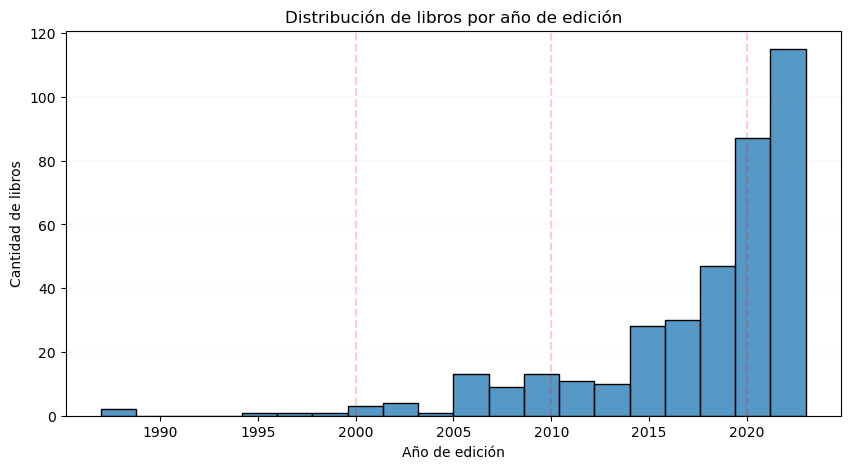

In [15]:
#Variable: Año

plt.figure(figsize=(10,5))
sns.histplot(df_libros.Año, kde=False, bins=20)

plt.xlabel('Año de edición')
plt.ylabel('Cantidad de libros')
plt.title('Distribución de libros por año de edición')

plt.axvline(x=2000, color='red', linestyle='--',alpha=0.2)
plt.axvline(x=2010, color='red', linestyle='--',alpha=0.2)
plt.axvline(x=2020, color='red', linestyle='--',alpha=0.2)

plt.grid(color='gray', linestyle='-', linewidth=0.25, alpha=0.2, axis='y')

plt.show()

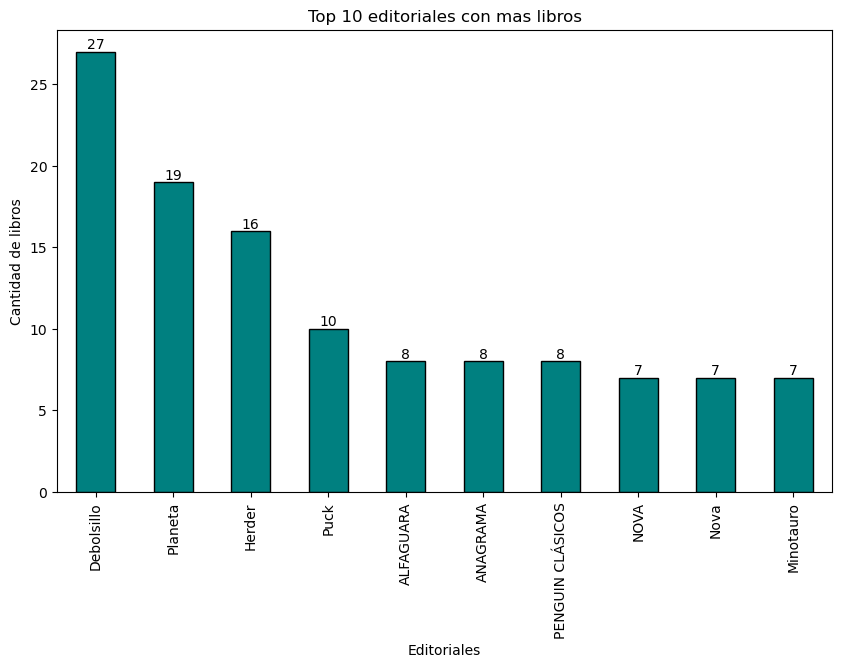

In [16]:
#Variable: Editoriales

top_editoriales = df_libros['Editorial'].value_counts().head(10)
ax = top_editoriales.plot.bar(color='teal', edgecolor='black')

ax.set_title('Top 10 editoriales con mas libros')
ax.set_xlabel('Editoriales')
ax.set_ylabel('Cantidad de libros')

for i, v in enumerate(top_editoriales.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

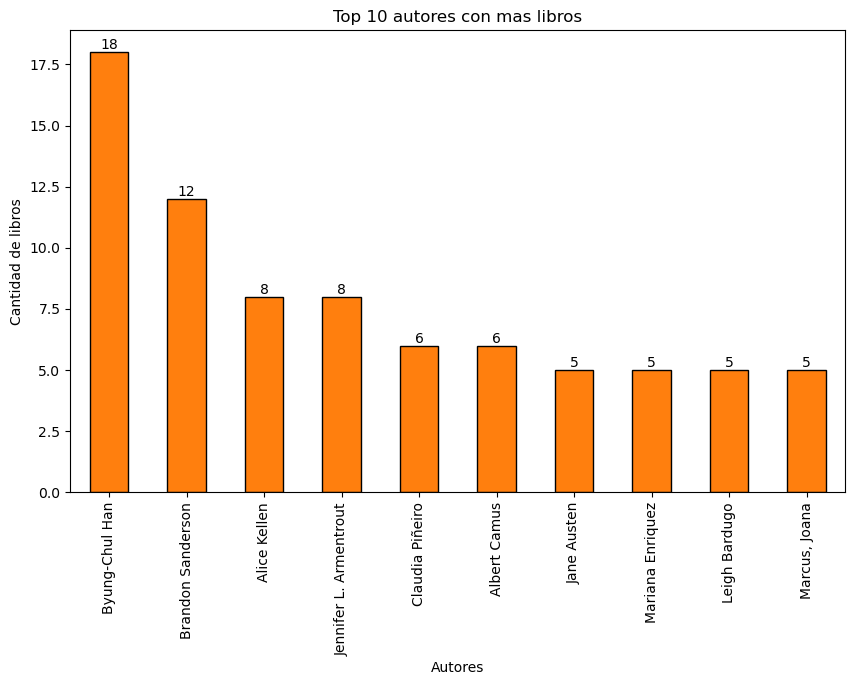

In [17]:
#Variable: Autor

top_autores = df_libros['Autor'].value_counts().head(10)
ax = top_autores.plot.bar(color='C1', edgecolor='black')

ax.set_title('Top 10 autores con mas libros')
ax.set_xlabel('Autores')
ax.set_ylabel('Cantidad de libros')

for i, v in enumerate(top_autores.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

# Análisis Bivariado

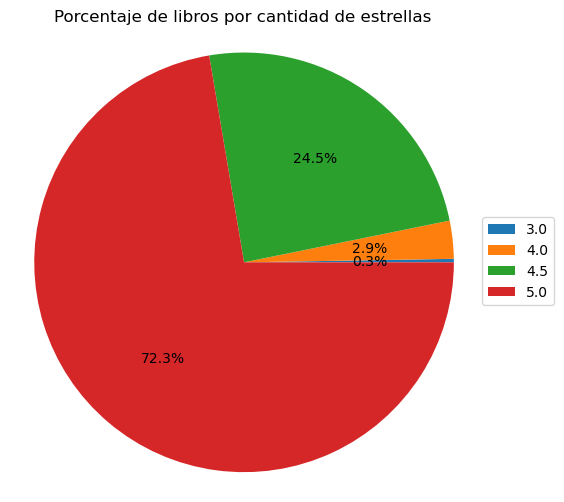

In [18]:
# Cantidad de libros según las estrellas recibidas

pie1 = df_libros.groupby('Estrellas').count().Titulo
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(pie1,autopct='%1.1f%%')
ax.legend(labels=pie1.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
ax.set_title("Porcentaje de libros por cantidad de estrellas")
plt.show()



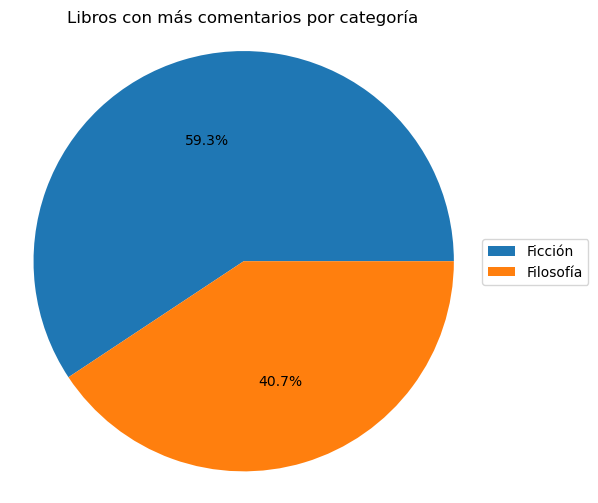

In [19]:
# Cantidad de libros según las estrellas recibidas

pie1 = df_libros.groupby('Categoria').count().Comentario
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(pie1,autopct='%1.1f%%')
ax.legend(labels=pie1.index,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
ax.set_title("Libros con más comentarios por categoría")
plt.show()

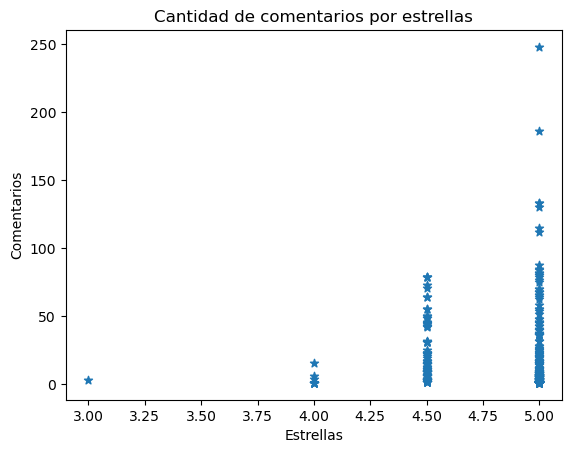

In [20]:
# Cantidad de comentarios según las estrellas recibidas

x = df_libros['Estrellas']
y = df_libros['Comentario']

# Gráfico
fig, ax = plt.subplots()

ax.scatter(x = x, y = y, marker = "*")
ax.set_title('Cantidad de comentarios por estrellas')

plt.xlabel('Estrellas')
plt.ylabel('Comentarios')

plt.show()

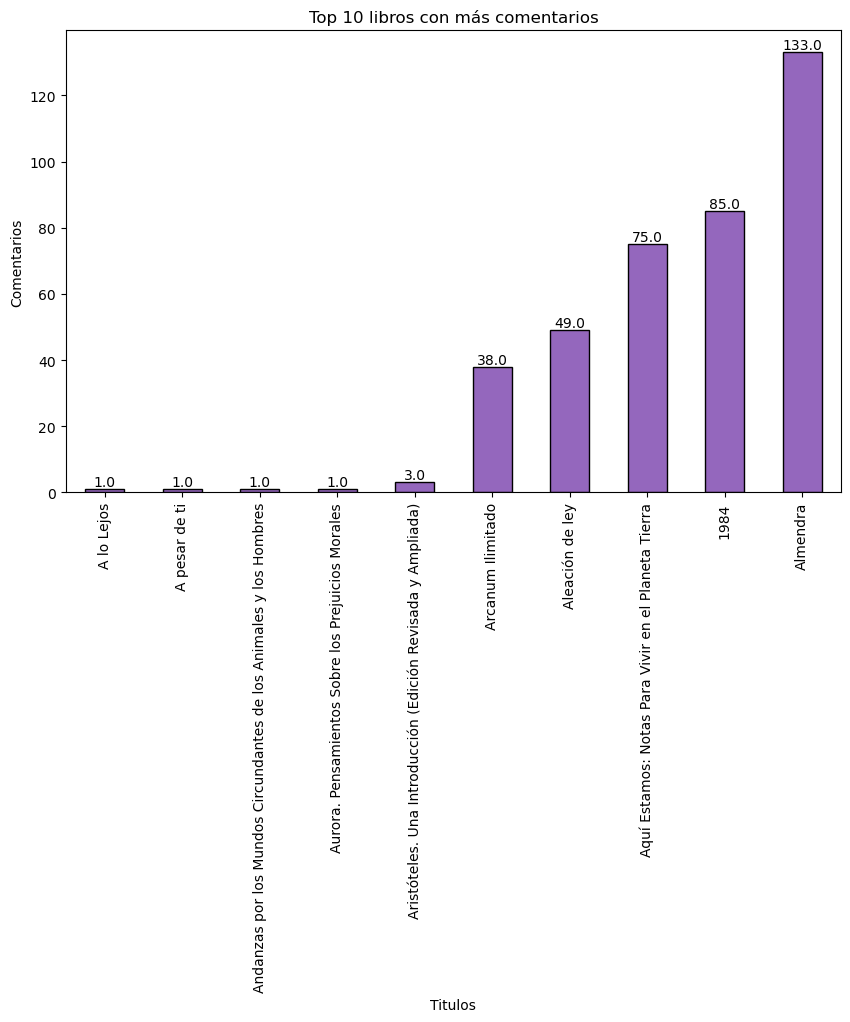

In [21]:
# Variables: libros y comentarios

top_libros = df_libros.groupby('Titulo')['Comentario'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C4', edgecolor='black')

ax.set_title('Top 10 libros con más comentarios')
ax.set_xlabel('Titulos')
ax.set_ylabel('Comentarios')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

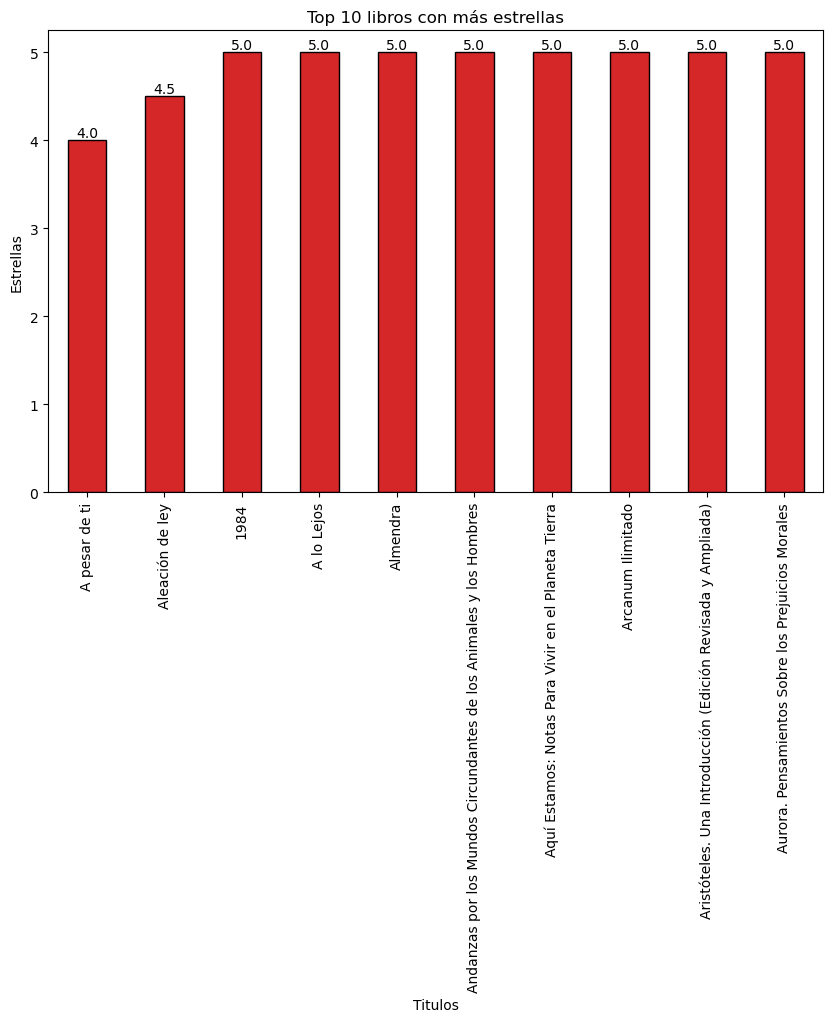

In [22]:
# Variables: libros y estrellas

top_libros = df_libros.groupby('Titulo')['Estrellas'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C3', edgecolor='black')

ax.set_title('Top 10 libros con más estrellas')
ax.set_xlabel('Titulos')
ax.set_ylabel('Estrellas')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

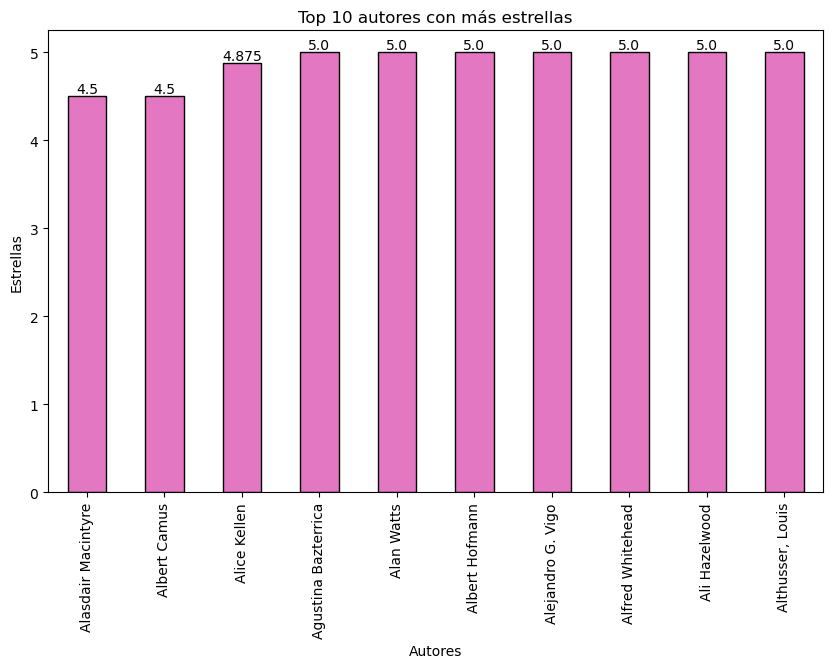

In [23]:
# Variables: Autores y estrellas

top_libros = df_libros.groupby('Autor')['Estrellas'].mean().head(10).sort_values()
ax = top_libros.plot.bar(color='C6', edgecolor='black')

ax.set_title('Top 10 autores con más estrellas')
ax.set_xlabel('Autores')
ax.set_ylabel('Estrellas')

for i, v in enumerate(top_libros.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Ajusta el tamaño del gráfico
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()

# Análisis Multivariado

<Figure size 768x576 with 0 Axes>

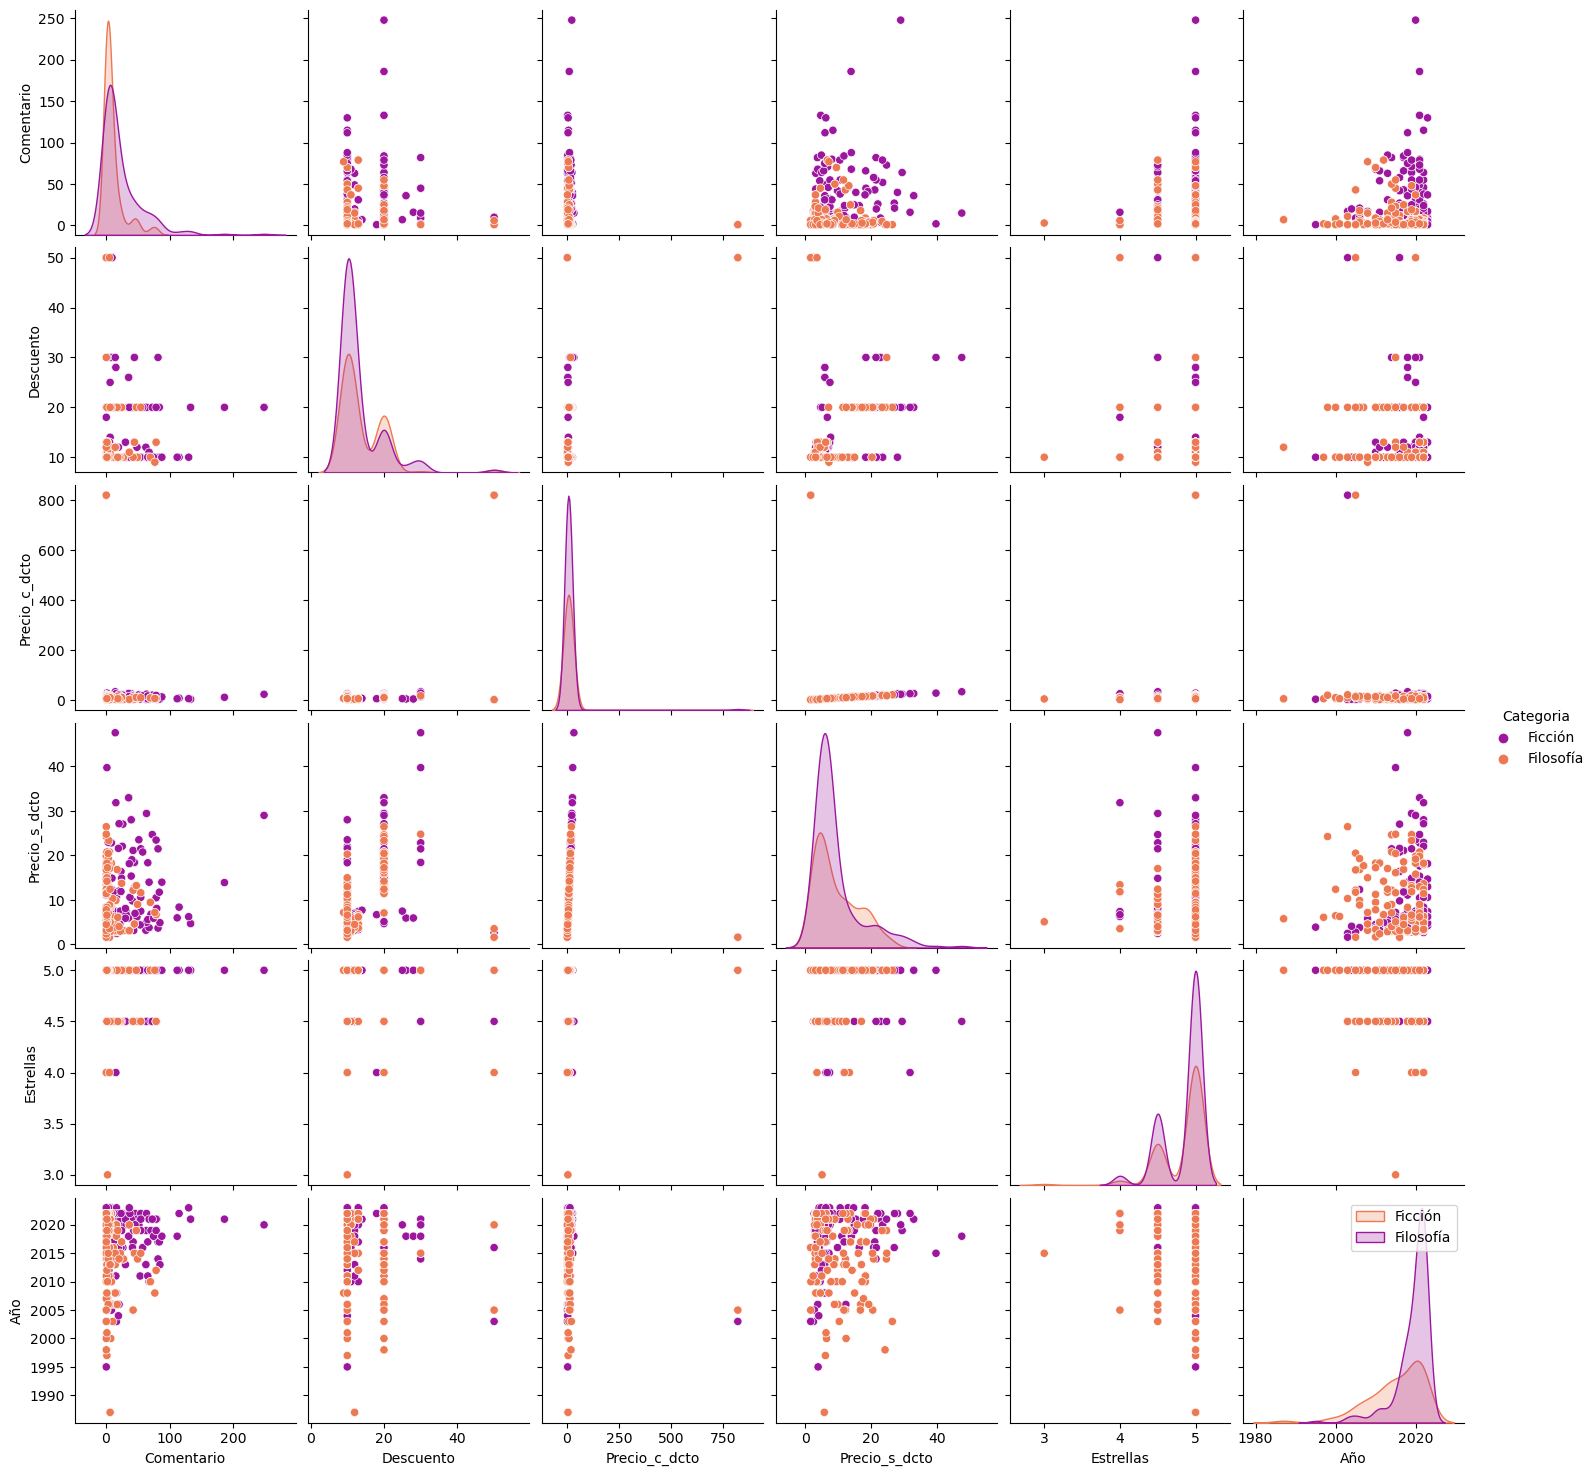

In [24]:
plt.figure(dpi = 120)
sns.pairplot(df_libros, hue = 'Categoria', palette = 'plasma')
plt.legend(['Ficción','Filosofía'])
plt.show()

Joint plot de Comentarios con otras variables ==> 

Correlacion entre Comentarios y Descuento ==>  0.054998735999785074


<Figure size 500x400 with 0 Axes>

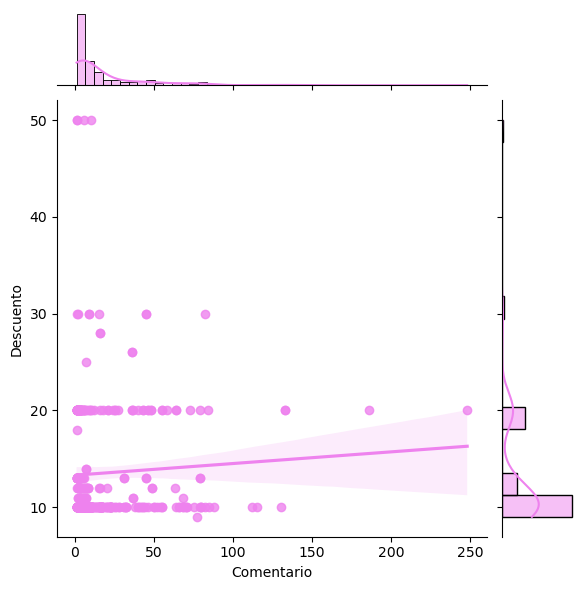

Correlacion entre Comentarios y Precio_c_dcto ==>  -0.029064989589436444


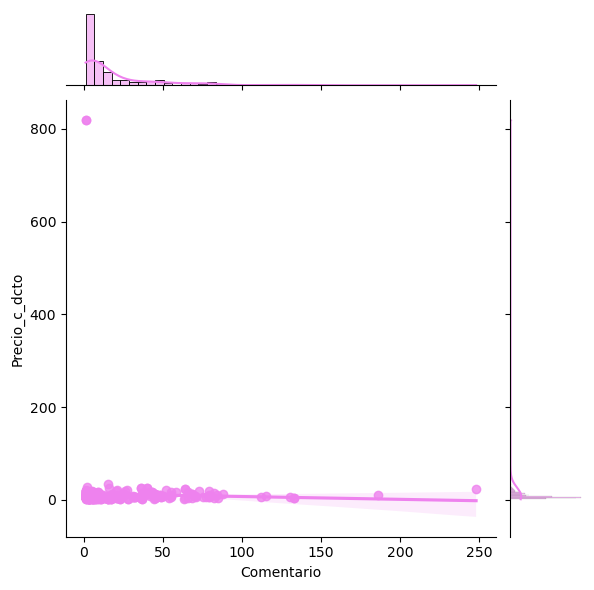

Correlacion entre Comentarios y Precio_s_dcto ==>  0.1756721983881444


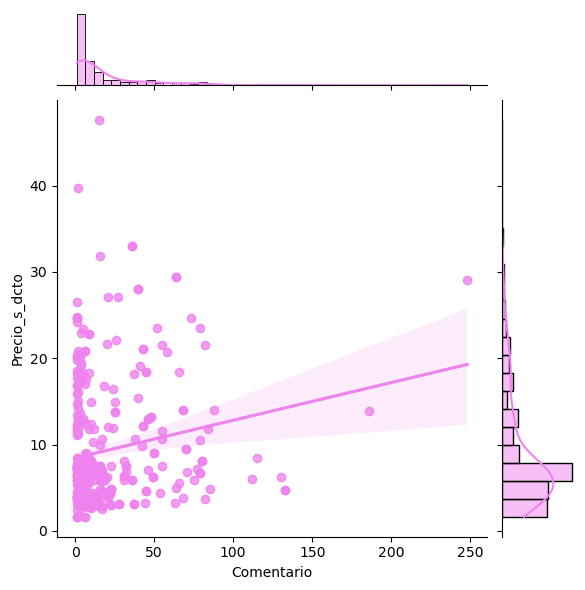

Correlacion entre Comentarios y Estrellas ==>  0.03134530798718667


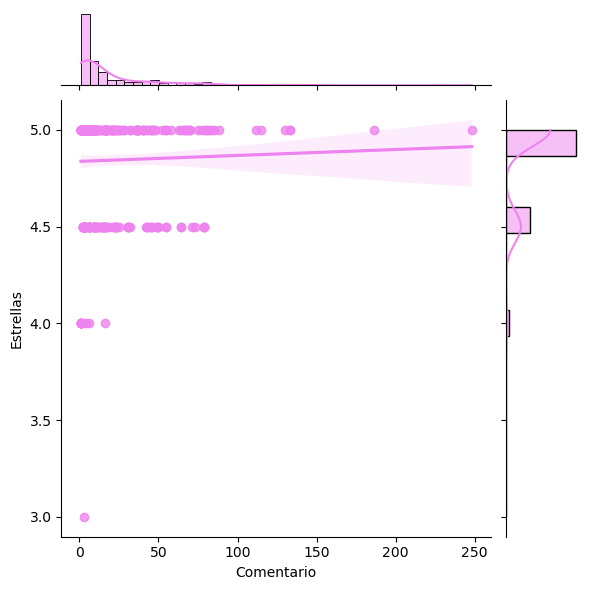

KeyError: 'Categoria'

In [25]:
col = list(df_libros.columns)
idx = col.index('Comentario')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Comentarios con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre Comentarios y {col[i]} ==> ",df_libros.corr().loc['Comentario'][col[i]])
    sns.jointplot(x='Comentario', y=col[i], data=df_libros, kind = 'reg',color = 'violet')
    plt.show()

In [26]:
df_libros.describe().T

,count,mean,std,min,25%,50%,75%,max
Comentario,376.0,18.712766,28.287334,1.00,2.00000,7.000,22.0000,248.00
Descuento,376.0,13.534574,6.202698,9.00,10.00000,10.000,18.5000,50.00
Precio_c_dcto,376.0,12.160301,59.332484,1.32,4.04400,5.836,9.9545,819.00
Precio_s_dcto,376.0,9.260721,7.035269,1.62,4.53675,6.650,12.1900,47.58
Estrellas,376.0,4.843085,0.276849,3.00,4.50000,5.000,5.0000,5.00
Año,376.0,2017.611702,5.855438,1987.00,2015.00000,2020.000,2022.0000,2023.00
